In [1]:
# install fast_ml library
! pip install fast_ml --quiet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt# Pie chart

In [3]:
from PIL import Image
import pickle

In [4]:
# Get a Regressor first! 

# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.experimental import 

# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import DecisionTreeClassifier
#from sklearn.ensemble import 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

import itertools

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

In [6]:
from fast_ml.model_development import train_valid_test_split

In [7]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [8]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.utils import all_estimators

In [10]:
#import sklearn
#estimators = sklearn.utils.all_estimators(type_filter=None)
#for name, class_ in estimators:
#    if hasattr(class_, 'predict_proba'):
#        print(name)

In [407]:
new_full_df = pd.read_pickle("new_full_df_Sept52023")
new_full_df

,Healthy,M-KOMPA,M-KOMPG,M-KOMPM,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,1,0,0,0,0,3,5,9,6,9,...,17,23,25,34,43,57,72,69,54,45
1,0,0,1,0,0,2,3,6,10,15,...,1,1,2,3,3,3,4,6,9,14
2,1,0,0,0,1,0,0,2,1,3,...,1,2,2,2,2,3,6,9,13,17
3,1,0,0,0,0,2,3,6,10,15,...,1,1,2,3,3,3,4,6,9,14
4,1,0,0,0,0,2,4,3,6,7,...,4,4,6,8,14,16,18,22,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,0,0,1,0,0,0,0,1,2,2,...,0,0,1,2,3,3,4,5,7,7
67184,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,3
67185,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,1,2
67186,1,0,0,0,6,6,6,6,6,6,...,4,1,0,0,0,0,0,0,1,1


In [408]:
y = new_full_df[{'Healthy','M-KOMPG','M-KOMPA','M-KOMPM'}]
y

,M-KOMPA,M-KOMPG,Healthy,M-KOMPM
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
67183,0,1,0,0
67184,0,0,1,0
67185,0,0,1,0
67186,0,0,1,0


In [409]:
cat_labels = np.where(y==1)[1]


In [410]:
new_df = new_full_df.drop(columns=['Healthy','M-KOMPG','M-KOMPA','M-KOMPM'])

y = new_full_df[{'Healthy','M-KOMPG','M-KOMPA','M-KOMPM'}]

cat_labels = np.where(y==1)[1]
y = pd.DataFrame(cat_labels,columns=['Result'])

#cat_labels = np.where(y==1)[1]
#newy = []
#for k in cat_labels:
#    if k==1:
#        newy.append(0)
#    else:
#        newy.append(1)
#y = pd.DataFrame(newy,columns=['Result'])

new_df.insert(0, "Result", cat_labels, True)
new_df

,Result,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,2,0,3,5,9,6,9,15,18,22,...,17,23,25,34,43,57,72,69,54,45
1,1,0,2,3,6,10,15,17,22,28,...,1,1,2,3,3,3,4,6,9,14
2,2,1,0,0,2,1,3,2,3,4,...,1,2,2,2,2,3,6,9,13,17
3,2,0,2,3,6,10,15,17,22,28,...,1,1,2,3,3,3,4,6,9,14
4,2,0,2,4,3,6,7,9,13,15,...,4,4,6,8,14,16,18,22,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,1,0,0,0,1,2,2,3,4,5,...,0,0,1,2,3,3,4,5,7,7
67184,2,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,3
67185,2,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,2
67186,2,6,6,6,6,6,6,6,6,5,...,4,1,0,0,0,0,0,0,1,1


In [411]:
new_df['Result'].unique()

array([2, 1, 0, 3])

In [230]:
Not this
X = new_full_df.drop(columns=['Healthy','M-KOMPG','M-KOMPA','M-KOMPM'])
y = new_full_df[{'Healthy','M-KOMPG','M-KOMPA','M-KOMPM'}]
cat_labels = np.where(y==1)[1]
newy = []
for k in cat_labels:
    if k==1:
        newy.append(0)
    else:
        newy.append(1)

y = pd.DataFrame(newy,columns=['Result'])
#y = y.reset_index(drop=True)
#X = X.reset_index(drop=True) # otherwise below will produce many more rows

# Adding dataframe to the right of the y dataframe
df_main = pd.concat([y,X], axis=1)
df_main#.drop(columns=['index'])

,Result,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.00,0.00,3.00,5.00,9.00,6.00,9.00,15.00,18.00,22.00,...,17.00,23.00,25.00,34.00,43.00,57.00,72.00,69.00,54.00,45.00
1,0.00,0.00,2.00,3.00,6.00,10.00,15.00,17.00,22.00,28.00,...,1.00,1.00,2.00,3.00,3.00,3.00,4.00,6.00,9.00,14.00
2,1.00,1.00,0.00,0.00,2.00,1.00,3.00,2.00,3.00,4.00,...,1.00,2.00,2.00,2.00,2.00,3.00,6.00,9.00,13.00,17.00
3,1.00,0.00,2.00,3.00,6.00,10.00,15.00,17.00,22.00,28.00,...,1.00,1.00,2.00,3.00,3.00,3.00,4.00,6.00,9.00,14.00
4,1.00,0.00,2.00,4.00,3.00,6.00,7.00,9.00,13.00,15.00,...,4.00,4.00,6.00,8.00,14.00,16.00,18.00,22.00,29.00,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,nan,0.00,0.00,0.00,1.00,2.00,2.00,3.00,4.00,5.00,...,0.00,0.00,1.00,2.00,3.00,3.00,4.00,5.00,7.00,7.00
67184,nan,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00
67185,nan,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00
67186,nan,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,5.00,...,4.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [412]:
X.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            67178, 67179, 67180, 67181, 67182, 67183, 67184, 67185, 67186,
            67187],
           dtype='int64', length=67050)

In [413]:
y.index=X.index
y

,Result
0,2
1,1
2,2
3,2
4,2
...,...
67183,1
67184,2
67185,2
67186,2


In [414]:
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [392]:
X_train[:2]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
59338,1,1,1,1,1,1,2,2,2,2,...,0,1,1,1,1,1,2,2,3,4
2666,0,3,5,8,7,11,13,19,21,23,...,2,1,3,4,6,3,3,5,5,9


In [393]:
y_train.index = X_train.index

In [394]:
y_train[:2]

,Result
59338,2
2666,2


In [15]:
modelETR = ExtraTreesRegressor() # 10 minutes
modelXGBM = XGBRegressor()  # 10 seconds
modelHGBR = HistGradientBoostingRegressor() # 14 seconds
modelRF = RandomForestRegressor() # 54 minutes!
modelLGBM = LGBMRegressor() # 2 seconds

In [395]:
%%time
# Takes 6 seconds
#modelLGBM = LGBMRegressor()
modelHGBR.fit(X_train, y_train)#features_train, labels_train)

CPU times: user 5min 28s, sys: 1min 13s, total: 6min 42s
Wall time: 8.97 s


HistGradientBoostingRegressor()

In [17]:
%%time
# Takes 2 seconds
#modelLGBM = LGBMRegressor()
modelLGBM.fit(X_train, y_train)#features_train, labels_train)

CPU times: user 1min 2s, sys: 218 ms, total: 1min 2s
Wall time: 1.94 s


LGBMRegressor()

In [18]:
#%%time

#reg = LazyClassifier(ignore_warnings=False, custom_metric=None)

#reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
#N=16500
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#print(models)

In [ ]:
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
preds = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print(roc_auc)

In [19]:
def one_hot(i, vec_len):
  vector = [0]*vec_len
  vector[i] = 1
  return vector

def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  #cmat.set_index([pd.Index(labels, "")],inplace=True)
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")
  plt.show()

def format_prediction(predicted_outputs):
  predicted_image_array = np.zeros_like(image_array)
  i = 0
  for row,pixels in enumerate(predicted_image_array):
    for column in range(len(pixels)):
      p = np.argmax(predicted_outputs[i])
      predicted_image_array[row][column] = [WHITE,RED,BLUE][p]
      i += 1
  return predicted_image_array

In [404]:
def evaluate(y,y_hat,labels):
  print(classification_report(y,y_hat))
  cm = confusion_matrix(y,y_hat)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmat = pd.DataFrame(cm)
  cmat.columns = labels
  #cmat.set_index([pd.Index(labels, "")],inplace=True)
  sns.heatmap(cmat,cmap="YlGnBu", annot=True)
  plt.title("Confusion Matrix")
  plt.show()

def training_testing_model(train_data, train_labels, test_data, model_in):
    # Training the Random forest here
    model_in.fit(train_data, train_labels)#training_inputs, training_outputs_labels)
    pred = model_in.predict(test_data)
    pred = [np.int(np.round(k)) for k in list(pred)]
    # Now fix the predictions
    indices = [i for i, x in enumerate(pred) if x >= 3]
    for k in indices:
        pred[k]=3
        
    indices = [i for i, x in enumerate(pred) if x <= 0]
    for k in indices:
        pred[k]=0

    return pred

def prepare_confusion_matrix(in_test, in_pred):
    
    
    cm = confusion_matrix(in_test, in_pred)
    print(cm)

    th = cm[:,1].sum() # total healthy
    fph= th-cm[1,1]
    tg = cm[:,0].sum() # total IgG
    fpg= tg-cm[0,0]
    tm = cm[:,2].sum()
    fpm= tm-cm[2,2]
    ta = cm[:,3].sum()
    fpa= ta-cm[3,3]
    print('The proportion of false positives: Healthy = {:f}, IgG={:f}, IgA={:f}, IgM={:f}'.format(fph/th,fpg/tg,fpa/ta,fpm/tm))
    return th,fph, tg, fpg, tm, fpm, ta, fpa

In [ ]:
modelETR = ExtraTreesRegressor() # 10 minutes
modelXGBM = XGBRegressor()  # 10 seconds
modelHGBR = HistGradientBoostingRegressor() # 14 seconds
modelRF = RandomForestRegressor() # 54 minutes!
modelLGBM = LGBMRegressor() # 2 seconds

The size of the training and testing data is 46935 and 20115 respectively
For Model LGBM
[[  106   251   132     0]
 [   10  2246   856     0]
 [    3    94 15762     0]
 [    1   135   496    23]]
The proportion of false positives: Healthy = 0.176082, IgG=0.116667, IgA=0.000000, IgM=0.086049
              precision    recall  f1-score   support

           0       0.88      0.22      0.35       489
           1       0.82      0.72      0.77      3112
           2       0.91      0.99      0.95     15859
           3       1.00      0.04      0.07       655

    accuracy                           0.90     20115
   macro avg       0.91      0.49      0.53     20115
weighted avg       0.90      0.90      0.88     20115



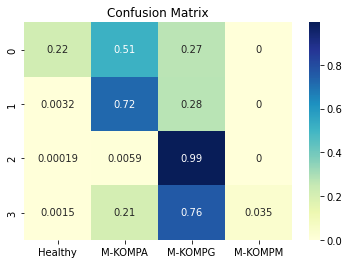



For Model HGBR
[[  116   223   150     0]
 [   11  2210   891     0]
 [    5    94 15760     0]
 [    1   127   501    26]]
The proportion of false positives: Healthy = 0.167295, IgG=0.127820, IgA=0.000000, IgM=0.089123
              precision    recall  f1-score   support

           0       0.87      0.24      0.37       489
           1       0.83      0.71      0.77      3112
           2       0.91      0.99      0.95     15859
           3       1.00      0.04      0.08       655

    accuracy                           0.90     20115
   macro avg       0.90      0.50      0.54     20115
weighted avg       0.90      0.90      0.88     20115



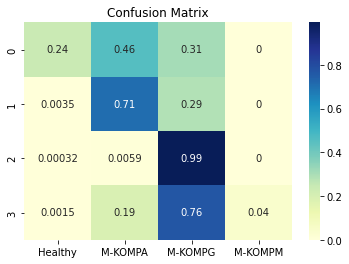

In [415]:
labels = ['Healthy','M-KOMPA','M-KOMPG','M-KOMPM']
modelnames = ['LGBM', 'HGBR']#'ETR']#', 
#modelnames = ['XGBM', ]
print('The size of the training and testing data is {} and {} respectively'.format(len(y_train),len(y_test)))
k=0
for model_in in [LGBMRegressor(), HistGradientBoostingRegressor()]:#ExtraTreesRegressor()]:#
#for model_in in [XGBRegressor(), HistGradientBoostingRegressor()]:#xgb_classifier, rf_classifier]:
    print('For Model {}'.format(modelnames[k]))
    pred = training_testing_model(X_train, y_train, X_test, model_in)

    th,fph, tg, fpg, tm, fpm, ta, fpa = prepare_confusion_matrix(y_test, pred)
    evaluate(y_test, pred, labels)
    
    k+=1
    print('\n')

In [416]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())

In [417]:
xgb_classifier.fit(X_train, y_train)#training_inputs, training_outputs_labels)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, reg_alpha=None,
                                      

In [418]:
labels = ['Healthy','M-KOMPA','M-KOMPM','M-KOMPG']#,'M-KOMPD']Healthy	M-KOMPA	M-KOMPG	M-KOMPM

In [419]:
xgb_predictions_labels = xgb_classifier.predict(X_test)
#xgb_predictions_labels

In [420]:
#training_outputs_labels_l = [np.argmax(training_outputs_labels.iloc[p,:]) for p in range(len(training_outputs_labels))]

              precision    recall  f1-score   support

           0       0.80      0.56      0.66       489
           1       0.89      0.83      0.86      3112
           2       0.96      1.00      0.98     15859
           3       0.78      0.41      0.54       655

    accuracy                           0.94     20115
   macro avg       0.86      0.70      0.76     20115
weighted avg       0.94      0.94      0.94     20115



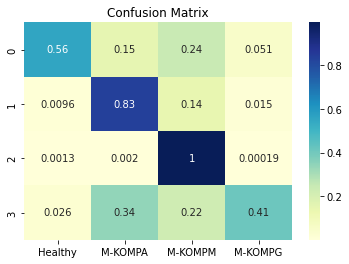

In [421]:
evaluate(y_test, xgb_predictions_labels, labels)#(testing_outputs_labels_l, rf_predictions_labels, labels)
#xgb_predictions = [one_hot(p,z) for p in xgb_predictions_labels]
#Image.fromarray(xgb_predictions_labels)#format_prediction(xgb_predictions_labels))

In [38]:
def my_metrics(true, pred):
    sumcorrect=0
    sumincorrect=0
    eps=0.1
    N=len(true)#y_test)
    #predres = modelHGBR.predict(X_test.iloc[:N,:])
    #trueres = y_test['Result'].iloc[:N]
    for k in range(N):#range(16797):
        #row=X_test.iloc[k,:]
        #trueres[k]#=y_test.iloc[k]
        #predres=gbm.predict(row)
        #print("true", true[k], "pred", pred[k])
        if abs(true[k]-pred[k])<eps:
            sumcorrect+=1 
        else:
            sumincorrect+=1
    #print("Correct: ",sumcorrect,". Incorrect: ",sumincorrect)
    #print("missclassification rate = ", (sumincorrect)/sumcorrect)
    return sumcorrect, sumincorrect

In [39]:
xgb_predictions_labels

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
cor, sumincor = my_metrics(list(y_test['Result']), list(xgb_predictions_labels))
print("We have {} correct and {} inccorrect.".format(cor,sumincor))

We have 6406 correct and 299 inccorrect.


## Now we find all indices for the 3 categories: low, medium, high protein 

In [51]:
# Import dataset and take a look at the Analysis subcategory

df = pd.read_csv('../M-komp_210420.csv')#, index_col=0)
df.Analysis

0          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
1        M-KOMPG^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IG...
2          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
3          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
4          S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^S-A1AT^
                               ...                        
67183    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGA^S-PROTE^S-I...
67184    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67185               S-ALB^S-IGG^S-IGA^S-PROTE^S-IGM^MFIXS^
67186    MFIXS^S-ALB^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-IGM^...
67187    S-ALB^S-A1AT^S-OROSO^S-HAPTO^S-IGG^S-IGA^S-PRO...
Name: Analysis, Length: 67188, dtype: object

In [55]:
val_histdf = df.PValue.str.split("^",expand=True,)
val_histdf.iloc[:10,:10]#.head(50)

,0,1,2,3,4,5,6,7,8,9
0,45,"1,1","1,2",18*,"1,1","1,2","1,2",,None,None
1,25*,38,"1,1","1,2",12,"1,2","1,1","1,1",,None
2,32*,"1,1","1,2",10,"1,2","1,1","1,1",,None,None
3,29*,"2,0*","1,3",11,"1,2","1,3","1,3",,None,None
4,40,"1,0","1,0",10,"1,0","1,0","1,0",,None,None
5,20*,"2,0*","2,0*",10,"1,0","1,0","1,0",,None,None
6,40,"1,1","1,1",11,"1,1","1,1","1,1",,None,None
7,32*,"2,0*","2,0*",12,"2,0","2,0","2,0*",,None,None
8,22*,"2,0*","2,0*","2,0*",22*,"2,0","2,0*",,None,None
9,45,"1,0","2,0*","2,0*","1,0","1,0","1,0",,None,None


In [74]:
analysis_df = df.Analysis.str.split("^",expand=True,)
analysis_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,...,None,None,None,None,None,None,None,None,None,None
1,M-KOMPG,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,...,None,None,None,None,None,None,None,None,None,None
2,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,...,None,None,None,None,None,None,None,None,None,None
3,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,...,None,None,None,None,None,None,None,None,None,None
4,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,S-ALB,S-A1AT,S-OROSO,S-HAPTO,S-IGA,S-PROTE,S-IGM,S-KAPPAF,S-LAMBDF,S-KA/LAF,...,None,None,None,None,None,None,None,None,None,None
67184,MFIXS,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,S-PROTE,,...,None,None,None,None,None,None,None,None,None,None
67185,S-ALB,S-IGG,S-IGA,S-PROTE,S-IGM,MFIXS,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
67186,MFIXS,S-ALB,S-OROSO,S-HAPTO,S-IGG,S-IGA,S-IGM,S-A1AT,S-PROTE,,...,None,None,None,None,None,None,None,None,None,None


In [56]:
pvalue_df = df.PValue.str.split("^",expand=True,)
pvalue_df 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,45,"1,1","1,2",18*,"1,1","1,2","1,2",,None,None,...,None,None,None,None,None,None,None,None,None,None
1,25*,38,"1,1","1,2",12,"1,2","1,1","1,1",,None,...,None,None,None,None,None,None,None,None,None,None
2,32*,"1,1","1,2",10,"1,2","1,1","1,1",,None,None,...,None,None,None,None,None,None,None,None,None,None
3,29*,"2,0*","1,3",11,"1,2","1,3","1,3",,None,None,...,None,None,None,None,None,None,None,None,None,None
4,40,"1,0","1,0",10,"1,0","1,0","1,0",,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67183,29*,"2,1*","1,0","3,4*","0,85*",64,"0,80",96*,74*,"1,3",...,None,None,None,None,None,None,None,None,None,None
67184,Komm,47*,"0,80","1,1","9,2","0,87*","0,41","1,3",76,,...,None,None,None,None,None,None,None,None,None,None
67185,43,15,"3,4",84*,"1,2",Komm,,None,None,None,...,None,None,None,None,None,None,None,None,None,None
67186,Komm,30*,"2,4*","0,35",10,"3,6","0,67","2,4*",62*,,...,None,None,None,None,None,None,None,None,None,None


In [422]:
# Here we identify the type and count it
def amount(res):
    ranges = [1., 5.0]
    if res<ranges[0]: # less than
        loc = 0
    elif res>ranges[1]: # greater than
        loc = 2
    else:
        loc = 1
    return loc

def switch(lang):
    if "M-KOMPA" in lang:
        #print("A Found")
        return 0#"You can become a web developer."
    elif "M-KOMPG" in lang:
        #print("G Found")
        return 3#"You can become a backend developer."
    elif "M-KOMPM" in lang:
        #print("M found")
        return 6#"You can become a Data Scientist"
    #elif "KOMP" in lang:
    #    return 0#"You can become a Blockchain developer."
    else:
        return -1

def countmarks(loc1,res,arr_in):
    

    if loc1 == -1: # not one of the markings we count
        return arr_in # returns array without adding anything to it
    else:
        loc  = amount(res)
        #print("location: loc+loc1={}+{}={}".format(loc,loc1,loc1+loc))
        arr_in[loc1+loc] +=1


    return arr_in#[Kl, K15, KG, Al, A15, AG, Gl, G15, GG, Ml, M15, MG]

In [423]:
def conv_to_float(in_sample):
    errors = 0
    count_less = 0
    stock_price = in_sample #"2,999.99"
    stock_price_float = ""
    for x in stock_price:        
        if x == ',':
            x = '.'
        if x == '*':
            continue
        if x == '<':
            count_less += 1
            continue
        else:
            stock_price_float += x
    
    try:
        #x = int(input("Please enter a number: "))
        stock_price_float = float(stock_price_float)
        #break
    except ValueError:
        errors += 1
        #print("Oops!  That was not a valid number. It says: ", stock_price)
    
    return stock_price_float, errors, count_less


In [255]:
50271 in X_test.index

False

In [262]:
test_set_index = y_test.index
test_set_index

Int64Index([35894, 13752, 20419, 10684, 53135, 56385, 56327, 53834,  7220,
            50271,
            ...
            50496, 59646,  2949, 57031,  8465, 10029,  8413, 15253, 13297,
            58985],
           dtype='int64', length=6705)

In [308]:
list(X_test.index).index(10719)

3

In [325]:
X_test_list = list(X_test.index)
y_test_list = list(y_test.index)
for k in y_test_list:
    
    if k in X_test_list:
        print("Found ",k,"at location",X_test_list.index(k))
    else:
        print(k,"non existant")
        break

Found  35993 at location 0
Found  13789 at location 1
Found  20468 at location 2
Found  10719 at location 3
Found  53258 at location 4
Found  56508 at location 5
Found  56450 at location 6
Found  53957 at location 7
Found  7250 at location 8
Found  50386 at location 9
Found  8064 at location 10
Found  48555 at location 11
Found  25140 at location 12
Found  20769 at location 13
Found  24669 at location 14
Found  50088 at location 15
Found  60573 at location 16
Found  10288 at location 17
Found  38698 at location 18
Found  23410 at location 19
Found  45663 at location 20
Found  51293 at location 21
Found  40372 at location 22
Found  34383 at location 23
Found  2256 at location 24
Found  63993 at location 25
Found  24675 at location 26
Found  2771 at location 27
Found  57674 at location 28
Found  42353 at location 29
Found  26506 at location 30
Found  3886 at location 31
Found  3415 at location 32
Found  26635 at location 33
Found  7231 at location 34
Found  46575 at location 35
Found  63

Found  2009 at location 3272
Found  62412 at location 3273
Found  2805 at location 3274
Found  29324 at location 3275
Found  64392 at location 3276
Found  19535 at location 3277
Found  19528 at location 3278
Found  22771 at location 3279
Found  9853 at location 3280
Found  2941 at location 3281
Found  13146 at location 3282
Found  14317 at location 3283
Found  66779 at location 3284
Found  13204 at location 3285
Found  61194 at location 3286
Found  38261 at location 3287
Found  10224 at location 3288
Found  63808 at location 3289
Found  34786 at location 3290
Found  22029 at location 3291
Found  49378 at location 3292
Found  55444 at location 3293
Found  49611 at location 3294
Found  39837 at location 3295
Found  17254 at location 3296
Found  1414 at location 3297
Found  66934 at location 3298
Found  64257 at location 3299
Found  53455 at location 3300
Found  49555 at location 3301
Found  23482 at location 3302
Found  14469 at location 3303
Found  7713 at location 3304
Found  64549 at 

Found  33493 at location 4957
Found  24642 at location 4958
Found  5258 at location 4959
Found  9891 at location 4960
Found  14209 at location 4961
Found  33285 at location 4962
Found  11938 at location 4963
Found  35641 at location 4964
Found  9065 at location 4965
Found  43938 at location 4966
Found  61594 at location 4967
Found  17757 at location 4968
Found  40857 at location 4969
Found  4540 at location 4970
Found  9852 at location 4971
Found  13167 at location 4972
Found  62288 at location 4973
Found  44854 at location 4974
Found  65770 at location 4975
Found  38018 at location 4976
Found  66417 at location 4977
Found  26698 at location 4978
Found  63053 at location 4979
Found  25142 at location 4980
Found  30875 at location 4981
Found  66387 at location 4982
Found  38645 at location 4983
Found  10056 at location 4984
Found  44176 at location 4985
Found  52009 at location 4986
Found  63334 at location 4987
Found  36486 at location 4988
Found  29683 at location 4989
Found  42100 at

Found  29938 at location 6291
Found  27163 at location 6292
Found  40907 at location 6293
Found  57512 at location 6294
Found  63711 at location 6295
Found  17975 at location 6296
Found  16118 at location 6297
Found  15770 at location 6298
Found  52697 at location 6299
Found  8775 at location 6300
Found  59887 at location 6301
Found  19161 at location 6302
Found  12177 at location 6303
Found  210 at location 6304
Found  48587 at location 6305
Found  47651 at location 6306
Found  30061 at location 6307
Found  51524 at location 6308
Found  39272 at location 6309
Found  51355 at location 6310
Found  17140 at location 6311
Found  21683 at location 6312
Found  8614 at location 6313
Found  36566 at location 6314
Found  54075 at location 6315
Found  59495 at location 6316
Found  27205 at location 6317
Found  17507 at location 6318
Found  47029 at location 6319
Found  38540 at location 6320
Found  12655 at location 6321
Found  58437 at location 6322
Found  20867 at location 6323
Found  39748 a

In [276]:
## Find the indexes for K-KOMPA, G and M
#mkomp_df = new_full_df[new_full_df[{'M-KOMPA','M-KOMPG','M-KOMPM'}].sum(axis=1)==1]
#mkomp_df_index = mkomp_df.index
#mkomp_df = mkomp_df[{'M-KOMPA','M-KOMPG','M-KOMPM'}]
#mkomp_df
print(pvalue_df.loc[test_set_index[0]])#.loc[3]
print(analysis_df.loc[test_set_index[0],3])# = df.Analysis.str.split("^",expand=True,)

0       44
1     0,90
2      1,7
3       11
4      3,9
5     0,63
6      1,5
7         
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
Name: 35894, dtype: object
S-IGG


In [240]:
#list(test_set_index).any() == 32757
32757 in test_set_index
32757 in temp_df.index
32757 in df_main.index
32757 in X_test.index

False

In [424]:
temp_df = new_full_df[{'Healthy','M-KOMPG','M-KOMPA','M-KOMPM'}]
temp_df#.iloc[32757]

,M-KOMPA,M-KOMPG,Healthy,M-KOMPM
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
67183,0,1,0,0
67184,0,0,1,0
67185,0,0,1,0
67186,0,0,1,0


In [132]:
ind = 1
for k in range(len(analysis_df.loc[ind])):
    res, err, c_l = conv_to_float(pvalue_df.loc[ind,k])

TypeError: 'NoneType' object is not iterable

In [193]:
arr_ind = [[], [], [], [], [], [], [], [], []]


[[1, 1], []]

In [425]:
#Kl, K15, KG, Al, A15, AG, Gl, G15, GG, Ml, M15, MG = 
arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arr_ind = [[], [], [], [], [], [], [], [], []]
skipped_samples = 0
count_less = 0
markings = ['Healthy','M-KOMPG','M-KOMPA','M-KOMPM']#'M-KOMPA', 'M-KOMPG', 'M-KOMPM','M-KOMP']
for ind in X_test_list:#list(test_set_index):#[:10]:#range(len(mkomp_df)):#100,210):
    
    #loc1 = switch(df_main.loc[ind])
    #print("loc1=",loc1)
    #ind = test_set.loc[k].name
    #my_print(analysis_df.iloc[ind])
    #my_print(pvalue_df.iloc[ind])
    #print("k=",k,"ind:",ind)
    #loc1 = list(mkomp_df.iloc[k]).index(1)
    #print(mkomp_df.iloc[k])
    #print("This is marked to be in position:",loc1)
    for k in range(len(analysis_df.loc[ind])):
        #print(analysis_df.loc[ind,k])

        if analysis_df.loc[ind,k] not in markings:
            #print("Not in markings", analysis_df.iloc[ind,k])
            #print("moving to next word")
            continue
        
        if pvalue_df.loc[ind,k] == None:   # if None type object then skip
            continue
        loc1 = switch(analysis_df.loc[ind,k])#df_main.loc[ind])
        #print("loc1=",loc1)
        #if analysis_df.iloc[ind,k] == None: # if None type object then skip
        #    continue
        #my_print(pvalue_df.iloc[ind,k])
        res, err, c_l = conv_to_float(pvalue_df.loc[ind,k])
        if err == 0: # No error messages
            #print("Found:",analysis_df.loc[ind,k], loc1, res, err,c_l)
            #if c_l > 0:
            count_less += 1
            #now place res into the correct bin (low, mid or high) for later plotting
            if loc1 == -1: # not one of the markings we count
                continue
                #return arr_in # returns array without adding anything to it
            else:
                loc  = amount(res)
                #print("location: loc+loc1={}+{}={}".format(loc,loc1,loc1+loc))
                arr[loc1+loc] += 1#arr, loc = countmarks(loc1, res, arr)
                arr_ind[loc1+loc].append(ind)
            break
        else:
            #print("skipping sample:", res, "at location", k)
            skipped_samples += 1
        
        #temp = conv_to_float(pvalue_df.iloc[ind,k])[0]
print("We skipped ", skipped_samples, " listings due to strange markings next to the measurement such as: comm. ")
print("In total we have ", len(new_arr), "samples with S-KA/LAF markings.")
print("We found {} with A, G, M type of M-KOMP".format(count_less)) #which are less than 0.1".format(count_less))     
print("Order is: A, G, M and Total")
print("We found:",arr)#[Kl, K15, KG, Al, A15, AG, Gl, G15, GG, Ml, M15, MG])

We skipped  0  listings due to strange markings next to the measurement such as: comm. 
In total we have  0 samples with S-KA/LAF markings.
We found 1255 with A, G, M type of M-KOMP
Order is: A, G, M and Total
We found: [0, 34, 101, 3, 245, 670, 1, 64, 137, 0, 0, 0]


In [363]:
#X_test.loc[arr_ind[1]]

In [362]:
#for k in arr_ind[1]: 
#    print(k in y_test_list, y_test.loc[k])

In [345]:
#X_test.loc[{689, 60412}]#35993,8443}]#
#arr_ind[1]
X_test.loc[arr_ind[1][:2]]
#X_test.loc[54087]
#54087 in X_test.index#test_set_index

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
16109,7,0,7,9,12,14,11,16,20,25,...,6,0,3,4,10,11,8,8,6,12
61578,0,0,2,2,2,2,2,2,0,0,...,2,2,2,3,3,3,5,6,8,11


In [458]:
test_A_med_df = X_test.loc[arr_ind[8]]
y_test_A_med_df = y_test.loc[arr_ind[8]]

In [459]:
xgb_predictions_labels = xgb_classifier.predict(test_A_med_df)

In [460]:
labels

['Healthy', 'M-KOMPA', 'M-KOMPM', 'M-KOMPG']

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.53      0.69       137

    accuracy                           0.53       137
   macro avg       0.25      0.13      0.17       137
weighted avg       1.00      0.53      0.69       137



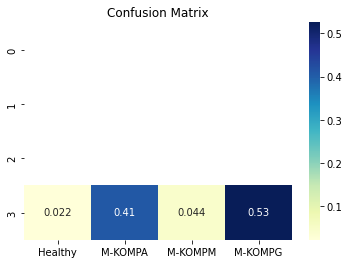

In [461]:
evaluate(y_test_A_med_df, xgb_predictions_labels, labels)

In [466]:
modelETR = ExtraTreesRegressor()

In [478]:
modelETR.fit(X_train, y_train)

ExtraTreesRegressor()

In [507]:
test_A_med_df = X_test.loc[arr_ind[5]]
y_test_A_med_df = y_test.loc[arr_ind[5]]
etr_predictions_labels = modelETR.predict(test_A_med_df)
etr_predictions_labels = np.round(etr_predictions_labels).astype(int)
evaluate(list(y_test_A_med_df["Result"]), etr_predictions_labels, labels)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       670
           2       0.00      0.00      0.00         0

    accuracy                           0.92       670
   macro avg       0.33      0.31      0.32       670
weighted avg       1.00      0.92      0.96       670



ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [495]:
#list(y_test_A_med_df["Result"])

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [490]:
etr_predictions_labels = modelETR.predict(test_A_med_df)
etr_predictions_labels = np.round(etr_predictions_labels).astype(int)

In [496]:
evaluate(list(y_test_A_med_df["Result"]), etr_predictions_labels, labels)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.09      0.16       137

    accuracy                           0.09       137
   macro avg       0.33      0.03      0.05       137
weighted avg       1.00      0.09      0.16       137



ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [27]:
mse_scores = []
corr=[]
icorr = []
try_this_model = modelXGBM
#try_this_model = modelRF # modelETR # modelHGBR

for train_index, test_index in kf.split(XX,yy):
    X_train, X_test = XX[train_index], XX[test_index]
    y_train, y_test = yy[train_index], yy[test_index]
    try_this_model.fit(X_train, y_train)
    #modelLGBM.fit(X_train, y_train)
    y_pred = try_this_model.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    #print("True**", y_test)
    #print("Pred@@", y_pred)
    sumc, sumi = my_metrics(list(y_test), list(y_pred))
    corr.append(sumc)
    icorr.append(sumi)

NameError: name 'kf' is not defined

In [28]:
missc = 0.0
acc = 0.0
for k in range(10):
    missc += corr[k]/icorr[k]
    acc += corr[k]/(corr[k]+icorr[k])
print("missclassification rate = ", missc/len(corr))
print("Accuracy:",acc/10)

IndexError: list index out of range